# HW0 Word Similarity

In [1]:
from nltk import word_tokenize
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic
from collections import Counter, OrderedDict
import gensim
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

First, load 3 Corpus `punkt`, `wordnet_ic` and `wordnet`

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet_ic')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/wenxinxu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Part A: Warm up with Linux and Python Basics

In this part of the assignment, you will learn a few handy Linux commands and play with a Python script.

First import some modules(pre-written code). Here nltk is most popular module used in nlp. We did it right above. 

Let's define a variable (in this case, it’s a string) called `greeting` 'Hello, world!'. 

Then use the nltk module’s `word_tokenize` method to make a list of all of the tokens—words or punctuation—in our `greeting` string. 

In [4]:
greeting = 'Hello, world!'
token_list = word_tokenize(greeting)
#TODO: add your own code to convert tokens into lower case
token_list = [token.lower() for token in token_list]

Python lists are kind of like arrays that automatically grow or shrink as needed. Like an array, you can iterate through it or index into it. We then use the for loop to print each token on its own line.
If you are unfamiliar with the following string formatting, check out this [tutorial](https://realpython.com/python-f-strings/). 

In [5]:
print(f"The token list is: {token_list}")
print(f"The tokens in the greeting are")
for token in token_list:
    print(token)

The token list is: ['hello', ',', 'world', '!']
The tokens in the greeting are
hello
,
world
!


We can count the number of occurrence of each word in a word list. Also, we can see if there are some repetitions of the word 'squirrel'. Let’s find out! 

In [7]:
#TODO: add your own code
from collections import Counter 

occur = Counter(token_list)

occur, occur['squirrel']

(Counter({'hello': 1, ',': 1, 'world': 1, '!': 1}), 0)

Now you should go back to the pure code part to fill out the code in `A.py`, and play with some Linux command lines. 

But wait! You maybe have learned some handy Linux commands, just for review, you can find plenty of Linux cheat sheets like [this](https://files.fosswire.com/2007/08/fwunixref.pdf). 

If you’re looking for more detail, [nixCraft](http://www.cyberciti.biz/) is often helpful.

First, modify line 4 of `A.py` so that the command `echo "This is a different greeting" | python3 A.py` produces the following output:

Hint: you can even excute command lines in this notebook. A simple tutorial is [here](http://www.math.uiuc.edu/~gfrancis/illimath/windows/aszgard_mini/doc/IPython81Manual/node12.html)

In [8]:
! echo "This is a different greeting" | python3 A.py

This is a different greeting

The tokens in the greeting are
This
is
a
different
greeting
There were 0 instances of the word 'squirrel' and 0 instances of the word 'girl.'


Hint: If you’re having trouble of printing the exactly same lines, take a look at this [StackExchange Q&A](http://stackoverflow.com/questions/11109859/pipe-output-from-shell-command-to-a-python-script).

What just happened? You used a pipe ( | ) to use the output of the first command as input to the second. Your first command was an `echo`, which just outputs the same thing you type in.

What if you already have a file with the text you want to use as input to your script? 

For example, suppose your GSI had already typed up the Squirrel Girl1 theme song for you, and you didn’t want to retype the whole thing. 

One thing you can do is use `cat <filename>`, which outputs the text of the file `cat squirrel_girl.txt` should print the Squirrel Girl lyrics to the screen. 

You can also run `A.py` on these lyrics by piping the output of your `cat` command into your `python` command, like so: 

In [9]:
! cat squirrel_girl.txt | python3 A.py

Squirrel Girl, Squirrel Girl!
She's a human and also squirrel!
Can she climb up a tree?
Yes she can, easily.
That's whyyyy
Her name is Squirrel Girl!

Is she tough? Listen bud:
She's got partially squirrel blood.
Who's her friend? Don't you know:
That's the squirrel, Tippy Toe.
Surprise!
She likes to talk to squirrels!

At the top of the trees,
is where she spends her time.
Like a huuuuman squirrel 
She enjoys fighting crime!!

Squirrel Girl, Squirrel Girl!
Powers of both squirrel and girl!
Finds some nuts, eats some nuts!
Kicks bad guuuuuys' evil butts!
To her, life is a great big acorn!
Where there's a city crime-torn,
You'll find the Squirrel Girl!!!!

The tokens in the greeting are
Squirrel
Girl
,
Squirrel
Girl
!
She
's
a
human
and
also
squirrel
!
Can
she
climb
up
a
tree
?
Yes
she
can
,
easily
.
That
's
whyyyy
Her
name
is
Squirrel
Girl
!
Is
she
tough
?
Listen
bud
:
She
's
got
partially
squirrel
blood
.
Who
's
her
friend
?
Do
n't
you
know
:
That
's
the
squirrel
,
Tippy
Toe
.
Surpris

There are a lot of repeated words in this song, aren’t there? 

I wonder if there are more repetitions of the word squirrel or girl. 

Let’s find out! Add the following line to the end of A.py:

Now, modify the $for$ loop to keep a count of the number of times “squirrel” appears and the number of times “girl” appears. Make the count case insensitive.

Hints:
* Make sure you’re initializing both variables (`squirrel` and `girl`) to 0 before the loop!
* The old standby `++` that you may know from other languages won’t work in Python, but you can still use `+= 1`
* Lower the words, see [here](https://docs.python.org/2/library/stdtypes.html#str.lower).

Half your grade for this assignment will be based on whether `A.py` is producing the right output, so you’d probably like to confirm that the output is correct. We’ve given you the correct output in `correct_outputA.txt`. You can check that your output matches ours by saving yours to a file, then using the `diff` command. 

Run the following lines in your terminal:

In [10]:
! cat squirrel_girl.txt | python3 A.py > outputA.txt 

In [11]:
! diff outputA.txt correct_outputA.txt

The `>` operator in the first line writes the text that would normally be printed to stdout into the file `outputA.txt` instead. 

If everything’s working, the second line should return with no output; this means there were no differences between the two files. 

If you accidentally replaced the first line of the song with “This line shouldn’t be here.” and then ran `diff`, you would see

This would show you exactly where your output was wrong, which should help you pinpoint the problem in your code.

More general Python and Numpy tutorial can be found at [Stanford CS231N](http://cs231n.github.io/python-numpy-tutorial/) if you aren't familiar with Python.

## Part B: Word Similarity

Word similarity can play an important role in information retrieval. For instance, suppose a user asked for information about birds, and your system had to decide which of the following passages to return:

_Stoats (Mustela erminea) were introduced into New Zealand to control rabbits and hares, but are now a major threat to the native bird population. The natural range of the stoat is limited to parts of the Northern Hemisphere. Immediately prior to human settlement, New Zealand did not have any land-based mammals apart from bats, but Polynesian and European settlers introduced a wide variety of animals._
(From [resource](https://en.wikipedia.org/wiki/Stoats_in_New_Zealand))

Or

_Eagles tend to be large birds with long, broad wings and massive feet. Booted eagles have legs and feet feathered to the toes and build very large stick nests. Ospreys, a single species found worldwide that specializes in catching fish and builds large stick nests. Kites have long wings and relatively weak legs. They spend much of their time soaring. They will take live vertebrate prey, but mostly feed on insects or even carrion._
(From [resource](https://en.wikipedia.org/wiki/Bird_of_prey))

Clearly, the second passage is more relevant, even though “bird” appears once in the first passage and “birds” appears once in the second. As humans, we know that words like “eagles” and “ospreys” are similar to “bird,” while words like “stoats” and “rabbits” are not very similar to “bird.”

In this part of the assignment, you will compare three word similarity measures to determine which agrees the most with human ratings of similarity. 

The three methods are:
- [Lin similarity](https://www.cs.swarthmore.edu/~richardw/cs65-f08/litreview/phyo.pdf)
- [Resnik similarity](https://arxiv.org/pdf/cmp-lg/9511007.pdf)
- [vector-based similarity](http://www.aclweb.org/anthology/D14-1162)

Lin similarity and Resnik similarity are both based on [WordNet](https://wordnet.princeton.edu/), a hand-built taxonomy of English words. 

The vector-based method represents words with [GloVe](http://nlp.stanford.edu/projects/glove/) or [Word2vec](https://code.google.com/archive/p/word2vec/) vectors that were automatically learned by a system that looked at a corpus of billions of words and measures how similar the words are by how close together their vectors are.

You won’t have to implement these algorithms from scratch, or even understand how they work, for this assignment. 

The [NLTK](http://www.nltk.org) library already implements Resnick and Lin similarity, 

and the [Gensim](https://radimrehurek.com/gensim/) library works with vector-based models such as GloVe and Word2Vec. 

We have provided the skeleton code in `B.py`, but you will need to fill in several functions to make it work.

#### B1: Parse the input file

First, implement `parseFile`. This function will be given the name of a file that contains a word pair and a similarity score (annotated by humans) on each line. 

To see an example of the format of the file, look at `input.txt`. 

Your function should read in the file and return a dictionary of `(word1, word2): score` entries. 

Make sure that you represent your scores as floats.

Hint: You can check out more on [file I/O in Python](https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files).

In [12]:
def parseFile(filename):
    '''
    
    ---Parameters---
    
    filename (str): a filename where each line is in the format "<word1>  <word2>  <human_score>"

    ---Returns---
    
    similarities (dict): a dictionary of {(word1, word2): human_score), ...}
    
    '''
    similarities = OrderedDict()
    #TODO: add your own code
    with open(filename) as f:
        for line in f:
            token_list = word_tokenize(line)
            similarities[(token_list[0], token_list[1])] = float(token_list[2])
    return similarities

Load the file of human similarity scores below:

In [13]:
human_sims = parseFile("input.txt")

The human similarity scores are between 0 and 10 (exactly the same). Let's try to see the human similarity between "tiget" and "cat":

In [14]:
human_sims[('tiger', 'cat')]

7.35

#### B2: Use WordNet to measure similarity

Next, implement `linSimilarities` and `resSimilarities` using NLTK. 

These functions are given a list of word pairs and a WordNet IC corpus (an information content file from the wordnet_ic corpus), and each should return a dictionary of `(word1, word2): score` entries. 

For this exercise, represent each word in the pair as the first noun in its WordNet synset. 

If no noun is found, represent it as the first verb in its WordNet synset.

Note that the NLTK Lin scores are between 0 and 1; these will need to be scaled by a factor of 10 to be comparable to the human similarity scores.

Hint: You can check out more on [NLTK’s similarity functions](http://www.nltk.org/howto/wordnet.html).

First, implement `linSimilarities`:

In [15]:
def linSimilarities(word_pairs, ic):
    '''
    Calculate Lin similarities between word pairs
    
    ---Parameters---
    
    word_pairs (a list of tuples): a list of tuples [(word1, word2), ...]
    ic: an information content file from the wordnet_ic corpus

    ---Returns---
    
    similarities (dict): a dictionary of Lin similarity scores {(word1, word2): lin_similarity_score, ...}
    
    '''
    similarities = {}
    # Fill in your code here
    for pair in word_pairs:
        synset1 = wn.synsets(pair[0], pos = wn.NOUN)
        synset2 = wn.synsets(pair[1], pos = wn.NOUN)
        if synset1 and synset2: # non-empty NOUN synsets
            similarities[(pair[0], pair[1])] = 10 * synset1[0].lin_similarity(synset2[0], ic)
            continue
        # at leat one word of the pair has no noun synset
        synset1 = wn.synsets(pair[0], pos = wn.VERB)
        synset2 = wn.synsets(pair[1], pos = wn.VERB)
        if synset1 and synset2: # non-empty VERB synsets
            similarities[(pair[0], pair[1])] = 10 * synset1[0].lin_similarity(synset2[0], ic)
    return similarities

Try `linSimilarities` below:

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wenxinxu/nltk_data...


True

In [20]:
#get brown_ic from wordnet_ic corpus
brown_ic = wordnet_ic.ic('ic-brown.dat')

sor = linSimilarities([('dog','cat'), ('dog', 'elephant')], brown_ic)
print(f'linsim is: {sor.values()}')

linsim is: dict_values([8.768009843733973, 5.312808366793076])


Now, complete `resSimilarities`:

In [38]:
def resSimilarities(word_pairs, ic):
    '''
    Calculate Resnik similarities between word pairs
    
    ---Parameters---
    
    word_pairs (a list of tuples): a list of tuples [(word1, word2), ...]
    ic: an information content file from the wordnet_ic corpus

    ---Returns---
    
    similarities (dict): a dictionary of Lin similarity scores {(word1, word2): res_similarity_score, ...}
    
    '''
    similarities = {}
    # Fill in your code here
    for pair in word_pairs:
        synset1 = wn.synsets(pair[0], pos = wn.NOUN)
        synset2 = wn.synsets(pair[1], pos = wn.NOUN)
        if synset1 and synset2: # non-empty NOUN synsets
            similarities[(pair[0], pair[1])] = synset1[0].res_similarity(synset2[0], ic)
            continue
        # at leat one word of the pair has no noun synset
        synset1 = wn.synsets(pair[0], pos = wn.VERB)
        synset2 = wn.synsets(pair[1], pos = wn.VERB)
        if synset1 and synset2: # non-empty VERB synsets
            similarities[(pair[0], pair[1])] = synset1[0].res_similarity(synset2[0], ic)
    return similarities

#### B3: Use the vector-based similarity measure

The vector-based similarity measure represents words with vectors (word embeddings) so that similar words are close together in the space. 

Word embeddings become the most popular way to represent words especially when deep learning models are introduced to solve many NLP tasks (these models usually use word embeddings of words as inputs). 

We're going to implement a neural network using word embeddings in this class later.

For this assignment, you only need to know how to use two pre-trained word embedding models [GloVe](http://nlp.stanford.edu/projects/glove/) or [Word2vec](https://code.google.com/archive/p/word2vec/). 

After you load these models, you can think them as dictionaries of `{word: [-0.04380177, 0.81042248, ..., -0.98958516]}` (see more real examples later). 

Once we have vectors for words, we can use Gensim to get the cosine similarity of corresponding words.

[Mikolov et al. (2013a)](https://www.aclweb.org/anthology/N/N13/N13-1090.pdf) has the following visualization of a word embedding space:

<img src="https://towardsml.files.wordpress.com/2018/06/capture2.png" style='width: 50%' />

You can see  not only these words of humans are close together, but also their relations are captured. 

For example, if you take the vector of "woman" minus the vector of "man," the resulting vector is the same as `Vector("aunt") − Vector("uncle")`.


___Additional notes:___

If you want to build word embedding models by youself. 

First, you should download [Word2vec](https://code.google.com/archive/p/word2vec/) or [GloVe](http://nlp.stanford.edu/projects/glove/). 

In NLP research, we would like to try different word embeddings, and select the one that gives us the best performance. 

Embeddings can differ in the dimension of their vectors as well as in the amount of data the vectors are trained on. 

The word embedding trained on larger datasets usually performs better. You can try out some other embeddings (e.g. glove.840B.300d) for curiosity. 

We provide the code to read these models (to read Glove into a dict, use `utils.glove2dict` from [here](https://github.com/cgpotts/cs224u/blob/master/utils.py)).

Set the directory to Glove word embedding:

In [26]:
filename = '/Users/wenxinxu/Desktop/LING780/homework/HW2/data/glove_embeddings.txt'

The code below will load a pre-trained vector-based model into memory. Notice it's going to take some time.

In [41]:
#load glove model
model = gensim.models.KeyedVectors.load_word2vec_format(filename, binary=False, no_header=True)

Now we can try real word embedding examples:

In [42]:
model['cat']

array([ 0.23088  ,  0.28283  ,  0.6318   , -0.59411  , -0.58599  ,
        0.63255  ,  0.24402  , -0.14108  ,  0.060815 , -0.7898   ,
       -0.29102  ,  0.14287  ,  0.72274  ,  0.20428  ,  0.1407   ,
        0.98757  ,  0.52533  ,  0.097456 ,  0.8822   ,  0.51221  ,
        0.40204  ,  0.21169  , -0.013109 , -0.71616  ,  0.55387  ,
        1.1452   , -0.88044  , -0.50216  , -0.22814  ,  0.023885 ,
        0.1072   ,  0.083739 ,  0.55015  ,  0.58479  ,  0.75816  ,
        0.45706  , -0.28001  ,  0.25225  ,  0.68965  , -0.60972  ,
        0.19578  ,  0.044209 , -0.31136  , -0.68826  , -0.22721  ,
        0.46185  , -0.77162  ,  0.10208  ,  0.55636  ,  0.067417 ,
       -0.57207  ,  0.23735  ,  0.4717   ,  0.82765  , -0.29263  ,
       -1.3422   , -0.099277 ,  0.28139  ,  0.41604  ,  0.10583  ,
        0.62203  ,  0.89496  , -0.23446  ,  0.51349  ,  0.99379  ,
        1.1846   , -0.16364  ,  0.20653  ,  0.73854  ,  0.24059  ,
       -0.96473  ,  0.13481  , -0.0072484,  0.33016  , -0.1236

#### PCA visualization of Word2Vec

`PCA` is a dimension reduction technique useful for visualizing high dimensional data in low dimensions (usually 2). The following code creates a scatterplot of some word2vec embeddings in 2D space.

In [33]:
def return_matrix(random_words, model, dim=100):
    word_matrix = np.random.randn(len(random_words), dim)
    i = 0
    for word in random_words:
        word_matrix[i] = model[word]
        i += 1
    return word_matrix

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
random_words = ["man", "woman", "uncle", "aunt", "king", "queen"]
return_matrix_ = return_matrix(random_words, model)
pca_ = PCA(n_components=2)
viz_data = pca_.fit_transform(return_matrix_) 

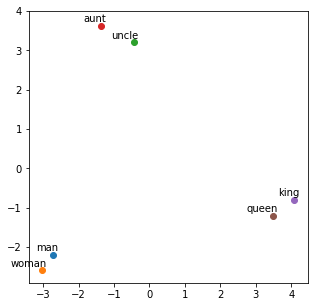

In [129]:
plt.figure(figsize=(5, 5)) 
for i in range(len(viz_data)):
    plt.scatter(viz_data[i, 0], viz_data[i, 1])
    plt.annotate(random_words[i],
                 xy=(viz_data[i, 0], viz_data[i, 1]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

Now, implement `vecSimilarities`. 

The usual list of word pairs and the pre-trained model will be passed in to your function. Like the other functions, it should return a dictionary of `(word1, word2): score` entries. 

You can use `Gensim` to get the cosine similarity between the vector for word1 and the vector for word2; 

you’ll need to multiply by ten like you did with the WordNet functions.

Hint: See more on [the model](https://radimrehurek.com/gensim/models/word2vec.html)

In [36]:
def vecSimilarities(word_pairs, model):
    '''
    Calculate cosine similarities between word pairs using word embeddings
    
    ---Parameters---
    
    word_pairs (a list of tuples): a list of tuples [(word1, word2), ...]
    model (gensim model): a word2vec model (word embedding model)

    ---Returns---
    
    similarities (dict): a dictionary of Lin similarity scores {(word1, word2): vec_similarity_score, ...}
    
    '''
    similarities = {}
    # Fill in your code here
    for pair in word_pairs:
        similarities[(pair[0], pair[1])] = 10 * model.similarity(pair[0].lower(), pair[1].lower())
    return similarities

#### B4: Save your output and check your work

Get three similarity scores for each word pair in `human_sims` so that we can compare these scores with human judges.

In [43]:
lin_sims = linSimilarities(human_sims.keys(), brown_ic)
res_sims = resSimilarities(human_sims.keys(), brown_ic)
vec_sims = vecSimilarities(human_sims.keys(), model)

Use the same technique you saw in Part A to save the output of part B to `output_B.txt`.

In [44]:
def save_output(lin_sims, res_sims, vec_sims):
    '''
    save the output
    
    ---Parameters---
    
    lin_sims, res_sims, vec_sims (dict): similarity scores for word pairs {(word1, word2): similarity_score}
    
    '''
    lin_score = 0
    res_score = 0
    vec_score = 0

    print(f"{'word1':15} {'word2':15} {'human':10} {'Lin':20} {'Resnik':20} {'Word2Vec':20}")

    for key, human in human_sims.items():
        try:
            lin = lin_sims[key]
        except:
            lin = 0
        lin_score += (lin - human) ** 2
        try:
            res = res_sims[key]
        except:
            res = 0
        res_score += (res - human) ** 2
        try:
            vec = vec_sims[key]
        except:
            vec = 0
        vec_score += (vec - human) ** 2
        print(f"{key[0]:15} {key[1]:15} {human:10} {lin:20} {res:20} {vec:20}")

    num_examples = len(human_sims)
    print("\nMean Squared Errors")
    print(f"Lin method error: {lin_score/num_examples:.2f}") 
    print(f"Resnick method error: {res_score/num_examples:.2f}")
    print(f"Vector-based method error: {vec_score/num_examples:.2f}")

In [45]:
save_output(lin_sims, res_sims, vec_sims)

word1           word2           human      Lin                  Resnik               Word2Vec            
tiger           cat                   7.35   2.0875196749630205   2.2241504712318556    5.415419340133667
tiger           tiger                 10.0                 10.0    12.26837533572617                 10.0
book            paper                 7.46   1.2143570284702045   0.8017591149538994    6.225871443748474
computer        keyboard              7.62    3.737908423475237    4.076481475394825    5.418189764022827
computer        internet              7.58    3.301904295102813   3.2576790258866897      7.2867751121521
plane           car                   5.77    7.194339072268571    5.921764790699729    5.961414575576782
train           car                   6.31    6.786666052669672    5.768922519672357      6.8227219581604
telephone       communication          7.5                 -0.0                 -0.0    6.329402923583984
television      radio                 6.77    

We have provided `correct_output_B.txt`, so you can diff your output against ours.

## Part C: Comparing Numpy with Pytorch

We will use [Pytorch](https://pytorch.org/) in most of our assignments in this class. We suppose that you are already familar with Numpy. 

In this section, we implement two same simple networks in both Numpy and Pytorch so that we can get some senses of differences between them. 

(Check out more details in [the Pytorch official tutorial](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#id17))

At its core, PyTorch provides two main features:
* An n-dimensional Tensor, similar to numpy but can run on GPUs
* Automatic differentiation for building and training neural networks

We will use a fully-connected ReLU network as our running example. The network will have a single hidden layer, and will be trained with gradient descent to fit random data by minimizing the Euclidean distance between the network output and the true output.

Numpy provides an n-dimensional array object, and many functions for manipulating these arrays. 

Numpy is a generic framework for scientific computing; it does not know anything about computation graphs, or deep learning, or gradients. 

However we can easily use numpy to fit a two-layer network to random data by manually implementing the forward and backward passes through the network using numpy operations:

In [46]:
# -*- coding: utf-8 -*-
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 40304320.61227014
1 40682001.99983903
2 41237867.99419424
3 34633254.912385136
4 22193918.51957117
5 11261284.588764021
6 5318666.864524838
7 2796539.026639132
8 1767432.5454492131
9 1291894.4853344164
10 1024197.9215817375
11 844904.3879154057
12 711210.7076259758
13 605717.1463428626
14 520233.143966499
15 449752.55257332907
16 391098.17322820507
17 341887.3898103385
18 300241.117432
19 264739.06086471357
20 234314.88671021943
21 208108.4707194612
22 185449.45268251107
23 165773.76576464967
24 148595.82190445697
25 133546.4246515673
26 120314.99414437514
27 108637.35865919563
28 98307.99037776611
29 89140.38645864965
30 80988.40418564514
31 73721.11429153878
32 67215.50417569275
33 61384.01000138554
34 56138.82519783947
35 51417.29005355944
36 47156.43305451682
37 43301.628606787366
38 39813.75611435356
39 36649.37159340152
40 33774.05879953873
41 31158.13428106346
42 28774.269745238176
43 26599.88791512246
44 24614.824519347425
45 22797.277223107438
46 21131.2510037753
47 19602.00

Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. 

For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning. 

However, we aren't using GPUs on the Zoo machines.

Here we introduce the most fundamental PyTorch concept: the Tensor. 

A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. 

Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

See [this page](https://pytorch.org/get-started/locally/) if you are using a different system (e.g. OSX or conda). 

Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. 

To run a PyTorch Tensor on GPU, you simply need to cast it to a new datatype.

Here we use PyTorch Tensors to fit a two-layer network to random data. 

Like the numpy example above we need to manually implement the forward and backward passes through the network:

In [47]:
# -*- coding: utf-8 -*-

import torch

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 24656736.0
1 18215596.0
2 15386913.0
3 13655857.0
4 12087073.0
5 10321528.0
6 8415059.0
7 6534388.0
8 4890714.0
9 3563092.5
10 2568393.5
11 1850454.375
12 1347404.625
13 997375.0625
14 754263.75
15 583579.6875
16 461999.25
17 373653.125
18 308086.03125
19 258221.046875
20 219458.78125
21 188672.828125
22 163777.34375
23 143301.34375
24 126224.7734375
25 111778.4765625
26 99424.6796875
27 88783.3203125
28 79565.59375
29 71523.1953125
30 64455.47265625
31 58216.109375
32 52687.1171875
33 47772.6875
34 43387.27734375
35 39462.6640625
36 35943.23828125
37 32780.37109375
38 29933.357421875
39 27363.826171875
40 25042.15234375
41 22942.154296875
42 21038.5859375
43 19311.080078125
44 17743.193359375
45 16317.5615234375
46 15018.98828125
47 13834.626953125
48 12753.7080078125
49 11767.9677734375
50 10866.541015625
51 10041.2529296875
52 9285.3125
53 8592.015625
54 7955.63671875
55 7371.55517578125
56 6834.81689453125
57 6340.94287109375
58 5886.1435546875
59 5467.16015625
60 5080.96484375
6

## Part D: Advanced PyTorch

For later assignments we will use PyTorch as a higher level library which provides functions for automatic differentiation, so we do not need to perform backpropagation by ourselves. 

Additionally, for complicated neural networks, we do not need to write the entire architecture from scratch, as PyTorch provides many fundamental models which we can combine and modify. 

Please refer to [this tutorial](https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html) for more details.

An example of such a model is the Long Short-Term Memory Network (LSTM), which you can read more about [here](http://colah.github.io/posts/2015-08-Understanding-LSTMs/). 

LSTMs will be covered later in the class, but for now you just need to know that they are used for sequence modeling by keeping track of a hidden state which is dependent upon previous inputs in the sequence. 

Sequence modeling is essential for NLP, as this defines some kind of temporal dependence in the input sequence. 

Automatic differentiation functions is provided by torch.optim:

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Words and labels must be converted to indices in order to be fed into the network. 

These indices are then converted to tensors by using the `prepare_sequence` function. 

In this example we will look at **part of speech training**; for each word we want to find its labeled part of speech. 

We will use some toy data to train a simple model.

In [49]:
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)

training_data = [
    ("The dog ate the apple".split(), ["DET", "NN", "V", "DET", "NN"]),
    ("Everybody read that book".split(), ["NN", "V", "DET", "NN"])
]
# convert toy training data to indices
word_to_ix = {}
for sent, tags in training_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(word_to_ix)
tag_to_ix = {"DET": 0, "NN": 1, "V": 2}
ix_to_tag = {val: key for key, val in tag_to_ix.items()}
# These will usually be more like 32 or 64 dimensional.
# We will keep them small, so we can see how the weights change as we train.
# NOTE: it is also possible to use pretrained embeddings like word2vec or glove, but this tutorial learns 
# an embedding layer along with the rest of the network
EMBEDDING_DIM = 6
HIDDEN_DIM = 6

{'The': 0, 'dog': 1, 'ate': 2, 'the': 3, 'apple': 4, 'Everybody': 5, 'read': 6, 'that': 7, 'book': 8}


All PyTorch models inherit from `nn.Module` and have a `forward()` function. 

Assume we have a class `MyModel` which inherits from `nn.Module` and has a forward function which takes in one parameter called "input". Then, to call the model, we can just run:

`output = MyModel(input)`. 

The model below has the following high-level structure:

word indices -> embedding -> LSTM hidden state -> conversion to tag space (dimension = number of tags) -> softmax probability over the tags


In [50]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (torch.zeros(1, 1, self.hidden_dim),
                torch.zeros(1, 1, self.hidden_dim))

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, self.hidden = self.lstm(
            embeds.view(len(sentence), 1, -1), self.hidden)
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

We then define the model and the loss function. 

We will learn more about loss functions, but **negative log likelihood** is a common loss function when you output probabilities over a set of classes (in this case part of speech tags). 

We then define an optimizer to perform stochastic gradient descent. 

You can read more about the optimizers available [here](https://pytorch.org/docs/stable/optim.html). 

We then loop over the training data 300 times and update the parameters based on the loss on our training data. 

In [63]:
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(tag_to_ix))
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# See what the scores are before training
# Note that element i,j of the output is the score for tag j for word i.
# Here we don't need to train, so the code is wrapped in torch.no_grad()
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)
    print(tag_scores)

for epoch in range(300):  # again, normally you would NOT do 300 epochs, it is toy data
    for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Also, we need to clear out the hidden state of the LSTM,
        # detaching it from its history on the last instance.
        model.hidden = model.init_hidden()

        # Step 2. Get our inputs ready for the network, that is, turn them into
        # Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = prepare_sequence(tags, tag_to_ix)

        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)

        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()

# See what the scores are after training
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)

    # The sentence is "the dog ate the apple".  i,j corresponds to score for tag j
    # for word i. The predicted tag is the maximum scoring tag.
    # Here, we can see the predicted sequence below is 0 1 2 0 1
    # since 0 is index of the maximum value of row 1,
    # 1 is the index of maximum value of row 2, etc.
    # Which is DET NOUN VERB DET NOUN, the correct sequence!
    print(tag_scores)
    predlabels = [ix_to_tag[int(idx)] for idx in tag_scores.argmax(dim=-1)]
    print(predlabels)

tensor([[-1.2279, -1.2197, -0.8873],
        [-1.1959, -1.2777, -0.8701],
        [-1.2242, -1.2044, -0.9011],
        [-1.2788, -1.0888, -0.9545],
        [-1.2699, -1.1586, -0.9033]])
tensor([[-0.0822, -3.4438, -3.0580],
        [-5.2884, -0.0283, -3.7805],
        [-3.4603, -3.4406, -0.0656],
        [-0.0457, -4.5218, -3.3867],
        [-5.6415, -0.0229, -3.9603]])
['DET', 'NN', 'V', 'DET', 'NN']
